In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


In [3]:
df = pd.read_csv('../Data/train_clean.csv')
df.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0


In [4]:
x_data = df.drop(['Unnamed: 0','Survived'], axis=1)
x_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [5]:
y_survived = df.Survived
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size=0.3, random_state=42)

In [7]:
dtc_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
y_predict = dtc_model.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[144  13]
 [ 39  72]]


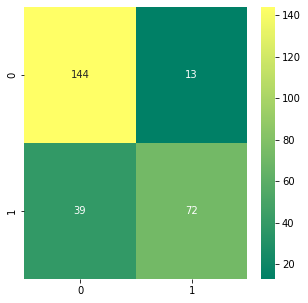

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,fmt='g', cmap='summer')
plt.show()

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.65      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [12]:
# GENERAR EL ARBOl

export_graphviz(dtc_model, out_file='../Data/arbol_clasificacion.dot', filled=True, feature_names=['Pclass','Sex','SibSp','Parch','Fare','Embarked'])

In [ ]:
# ver el arbol en http://www.webgraphviz.com/